# Honey Production
<hr/>

## Imports
<blockquote>
    Import all the required libraries
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ensemble Import
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

# Model metrics 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_squared_error, r2_score

%matplotlib inline

## Load Datasets
<blockquote>
    Load the Honey production dataset and check the shape
</blockquote>

In [ ]:
df = pd.read_csv("honeyproduction.csv").rename(columns={
    'numcol': 'n_colonies',
    'yieldpercol': 'production_per_colony',
    'totalprod': 'total_production',
    'stocks': 'stock_held',
    'priceperlb': 'price_per_lb',
    'prodvalue':'total_production_value'
})
df.shape

## EDA - Exploratory Data Analysis
<blockquote>
   This is a tool to analyze the data but not for building model.
   This data can be stored and use it in future for model building.
    <br/><b>Output:</b><br/>
    Summary view <br/>
    Visualization<br/>
    Qualitative variable (or Categorical variables)<br/>
    Quantitative variable(Continues variables)<br/>

</blockquote>

In [3]:
df.head(10)

,state,n_colonies,production_per_colony,total_production,stock_held,price_per_lb,total_production_value,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


In [8]:
df.tail() # Last 5 records

,state,n_colonies,production_per_colony,total_production,stock_held,price_per_lb,total_production_value,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [10]:
df.describe().transpose() # Summary of dataset

,count,mean,std,min,25%,50%,75%,max
n_colonies,626.0,6.028435e+04,9.107709e+04,2000.00,9000.0000,26000.00,63750.00,510000.00
production_per_colony,626.0,6.200958e+01,1.945875e+01,19.00,48.0000,60.00,74.00,136.00
total_production,626.0,4.169086e+06,6.883847e+06,84000.00,475000.0000,1533000.00,4175250.00,46410000.00
stock_held,626.0,1.318859e+06,2.272964e+06,8000.00,143000.0000,439500.00,1489500.00,13800000.00
price_per_lb,626.0,1.409569e+00,6.385989e-01,0.49,0.9325,1.36,1.68,4.15
total_production_value,626.0,4.715741e+06,7.976110e+06,162000.00,759250.0000,1841500.00,4703250.00,69615000.00
year,626.0,2.004864e+03,4.317306e+00,1998.00,2001.0000,2005.00,2009.00,2012.00


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
state                     626 non-null object
n_colonies                626 non-null float64
production_per_colony     626 non-null int64
total_production          626 non-null float64
stock_held                626 non-null float64
price_per_lb              626 non-null float64
total_production_value    626 non-null float64
year                      626 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


### Questions to ourself!
1. How the honey production yield and price changed over the years?
2. Total production per state 
3. Maximum and Average production 

In [20]:
# To understand the trending cols - Create a summary table with years group 
df_year = df[['n_colonies','production_per_colony','total_production','stock_held','price_per_lb','total_production_value','year']].groupby('year').mean()
df_year.head(20)

,n_colonies,production_per_colony,total_production,stock_held,price_per_lb,total_production_value
year,,,,,,
1998,60953.488372,69.953488,5.105093e+06,1.873605e+06,0.832558,3.397465e+06
1999,61325.581395,65.465116,4.706674e+06,1.823023e+06,0.804186,2.875744e+06
2000,60558.139535,67.581395,5.106000e+06,1.975721e+06,0.791395,3.059721e+06
2001,57772.727273,64.545455,4.221545e+06,1.471909e+06,0.911818,3.006409e+06
2002,58295.454545,66.795455,3.892386e+06,8.903864e+05,1.371364,5.165955e+06
2003,58886.363636,62.545455,4.122091e+06,9.231591e+05,1.494773,5.729068e+06
2004,61926.829268,64.804878,4.456805e+06,1.487341e+06,1.284634,4.812366e+06
2005,58390.243902,64.268293,4.243146e+06,1.516756e+06,1.195122,3.921780e+06
2006,58000.000000,61.853659,3.761902e+06,1.469146e+06,1.303659,3.851805e+06


Text(0.5, 1.0, 'Production changed over the years')

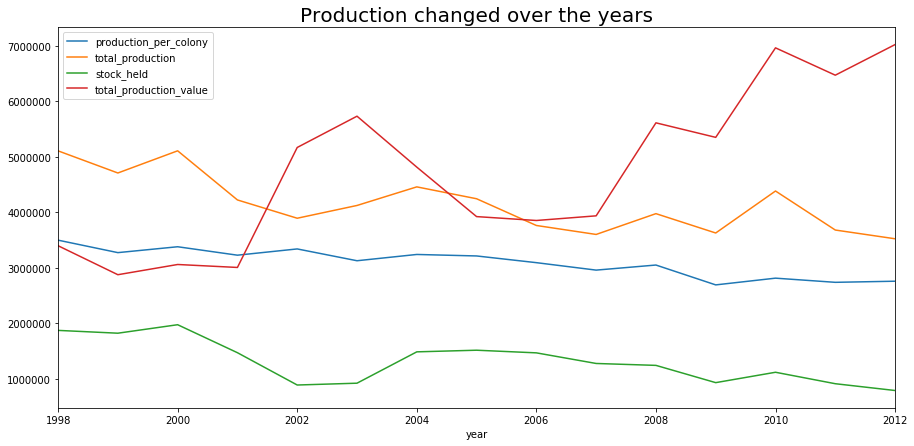

In [21]:
df_year['production_per_colony'] = 50000 * df_year['production_per_colony']
df_year[['production_per_colony', 'total_production', 'stock_held', 'total_production_value']].plot(ax=plt.subplots(figsize=(15,7))[1])
plt.title("Production changed over the years",fontsize=20)

Text(0.5, 1.0, 'Average price per lb over the years')

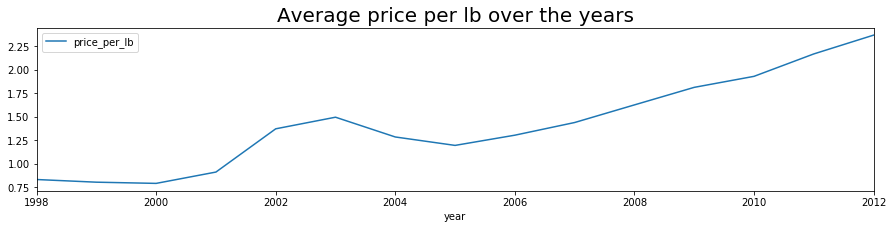

In [23]:
df_year[['price_per_lb']].plot(ax=plt.subplots(figsize=(15,3))[1])
plt.title("Average price per lb over the years", fontsize=20)

In [49]:
df_state = df[["state","total_production"]].groupby('state').sum().round().sort_values(by="total_production",ascending=False)
df_state.reset_index(level=0, inplace=True)
df_state.head(10)

,state,total_production
0,ND,475085000.0
1,CA,347535000.0
2,SD,266141000.0
3,FL,247048000.0
4,MT,156562000.0
5,MN,144360000.0
6,TX,104904000.0
7,WI,81833000.0
8,MI,72820000.0
9,ID,66160000.0


In [47]:
df_state.tail()

,state,total_production
39,VA,266533.0
40,ME,246733.0
41,KY,229667.0
42,MD,211000.0
43,OK,201167.0


Text(0, 0.5, 'Total production')

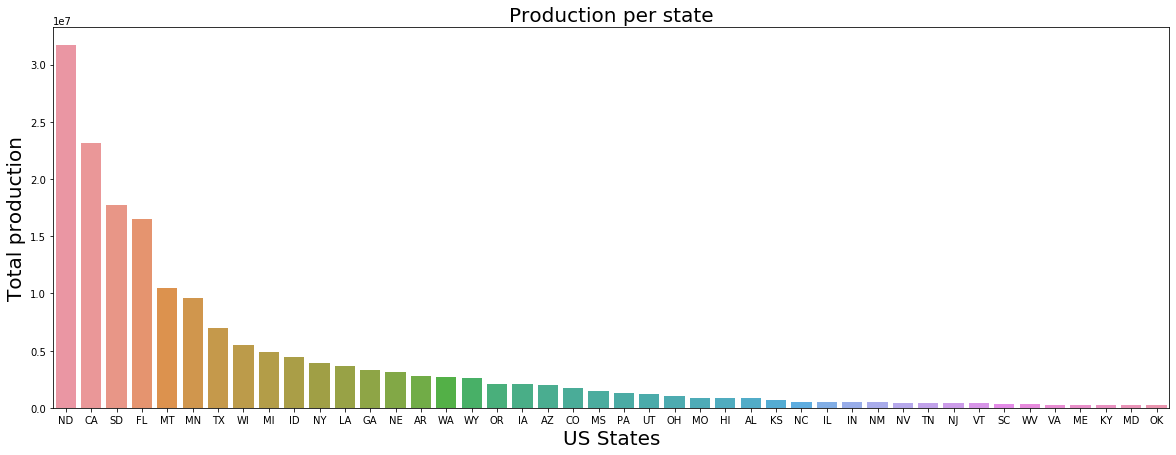

In [48]:
plt.figure(figsize=(20,7))
sns.barplot(x=df_state['state'], y=df_state['total_production'])
plt.title("Production per state", fontsize=20)
plt.xlabel("US States", fontsize=20)
plt.ylabel("Total production", fontsize=20)


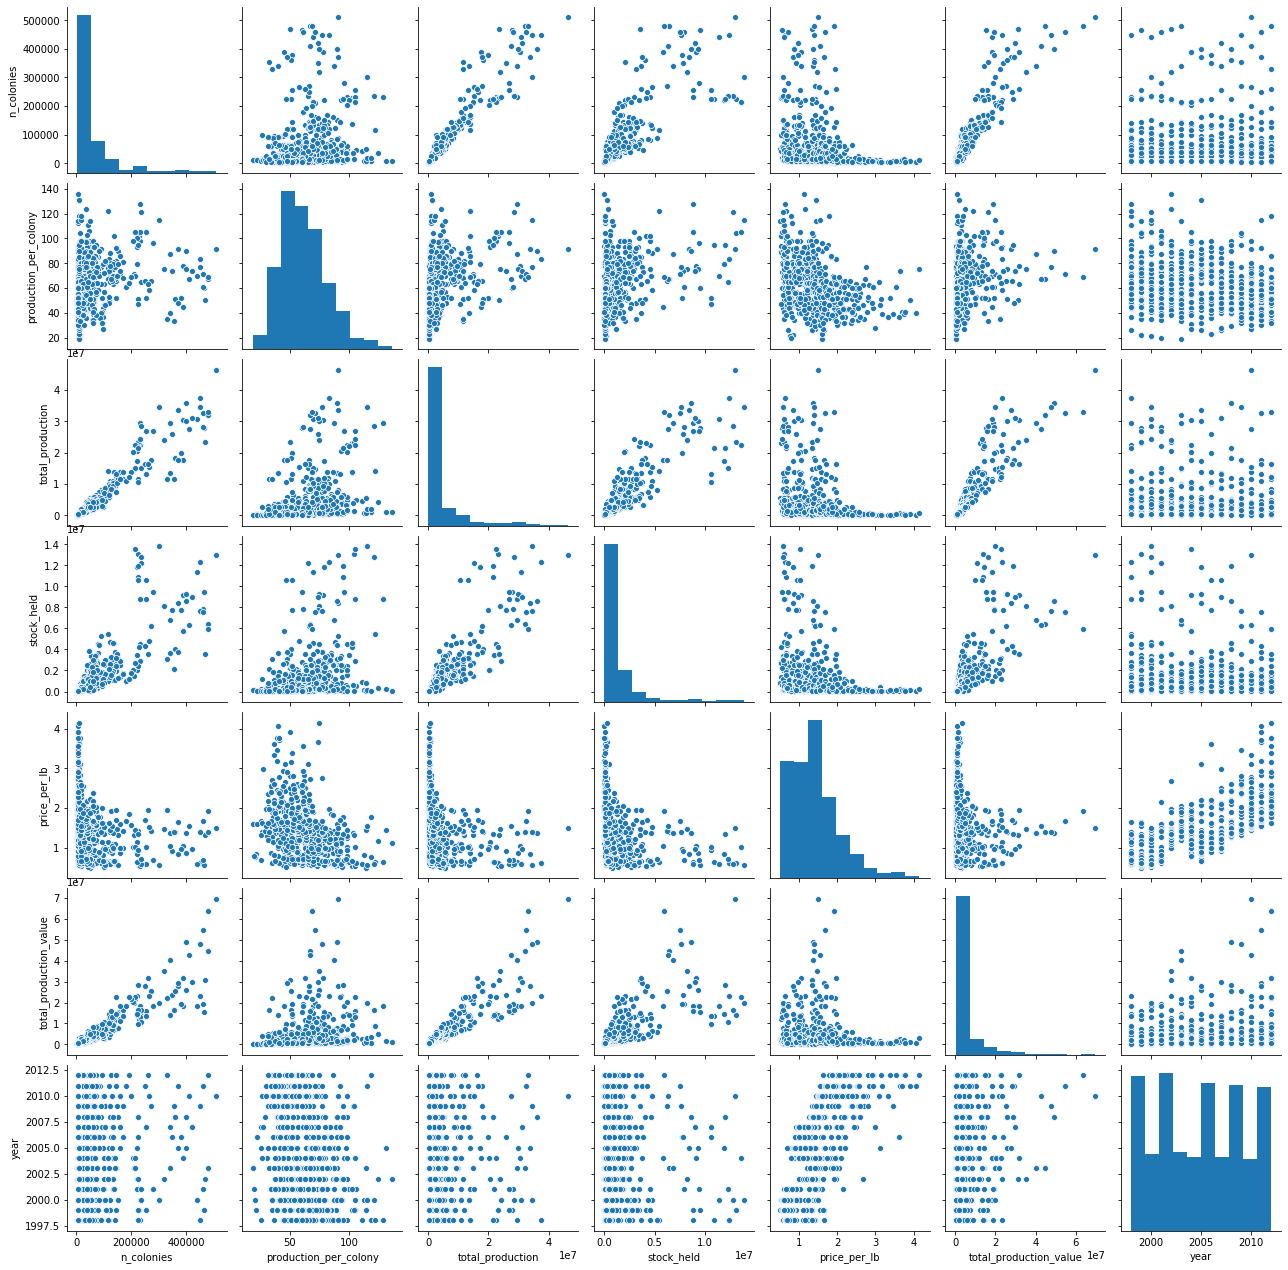

In [52]:
sns.pairplot(df)

/Users/sivanandhamp/opt/anaconda3/envs/GL_36/lib/python3.6/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


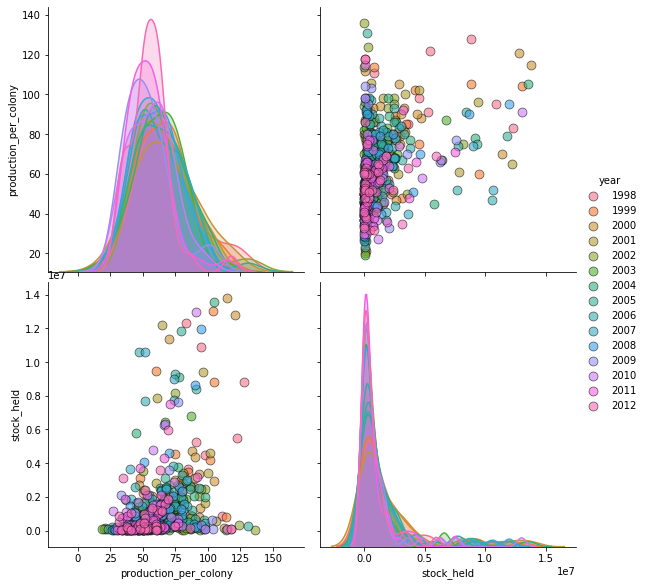

In [53]:
sns.pairplot(df[["production_per_colony","stock_held","year"]], hue="year", diag_kind="kde", plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

## Model building

In [20]:
df["state"].unique()

[AL, AZ, AR, CA, CO, ..., WA, WV, WI, WY, SC]
Length: 44
Categories (44, object): [AL, AZ, AR, CA, ..., WV, WI, WY, SC]

In [21]:
# Handle state name
cleanup = {"state": {
    'AL':1, 'AZ':2, 'AR':3, 'CA':4, 'CO':5, 'FL':6, 'GA':7, 'HI':8, 'ID':9, 'IL':10, 
    'IN':11, 'IA':12, 'KS':13, 'KY':14, 'LA':15, 'ME':16, 'MD':17, 'MI':18, 'MN':19, 'MS':20, 
    'MO':21, 'MT':22,'NE':23, 'NV':24, 'NJ':25, 'NM':26, 'NY':27, 'NC':28, 'ND':29, 'OH':30, 
    'OK':31, 'OR':32, 'PA':33, 'SD':34, 'TN':35, 'TX':36, 'UT':37, 'VT':38, 'VA':39, 'WA':40, 
    'WV':41, 'WI':42, 'WY':43, 'SC':44
}}
df = df.replace(cleanup) # OR Use one-hot encoding eg: get_dummies from pandas
df.head()

,state,n_colonies,production_per_colony,total_production,stock_held,price_per_lb,total_production_value,year
0,1,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,2,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,3,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,4,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,5,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [22]:
df.dtypes
df["state"] = df["state"].astype('category')

In [32]:
df.describe()

,n_colonies,production_per_colony,total_production,stock_held,price_per_lb,total_production_value,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


### Add minmax scaller to normalize the data

In [36]:
from sklearn.preprocessing import MinMaxScaler

# define scaler
scaler = MinMaxScaler()

# seprate the the feature and targe
feature = df.drop('total_production', axis=1)
target = df[['total_production']]
# transform data
scaled = scaler.fit_transform(feature)
print(scaled)


[[0.         0.02755906 0.44444444 ... 0.06284153 0.00944524 0.        ]
 [0.02325581 0.10433071 0.35042735 ... 0.04098361 0.02807654 0.        ]
 [0.04651163 0.1003937  0.39316239 ... 0.0273224  0.02693908 0.        ]
 ...
 [0.93023256 0.00787402 0.24786325 ... 0.66120219 0.0097332  1.        ]
 [0.95348837 0.11417323 0.42735043 ... 0.42622951 0.11986523 1.        ]
 [0.97674419 0.09448819 0.27350427 ... 0.37704918 0.06633263 1.        ]]


### Split the data set for training and testing

In [37]:
# X_train, X_test, y_train, y_test = train_test_split(df.drop('total_production', axis=1), df['total_production'], test_size=.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=.2, random_state=1)

### RandomForest Model building

In [38]:
rf = RandomForestRegressor(max_depth=10, n_estimators = 1000, random_state=42)
rf.fit(X_train, y_train)

/Users/sivanandhamp/opt/anaconda3/envs/GL_36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [39]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 195867.61221673223
Mean Squared Error: 181791238945.05807
Root Mean Squared Error: 426369.83822153514


In [40]:
# Get model accuracy
accuracy = rf.score(X_test, y_test)
print('Accuracy: ', accuracy)

Accuracy:  0.9941473581982948


The model is overfitting 

# Improve Model

#### The model accuracy is very slow, Add following steps to increase the accuracy
1. Handle imbalance data
2. Use MinMaxScaler since feature values not in same range
3. Model tuning: Use GridSearchCV or RandomSearchCV techniques to find best params
4. Try adding few more models/algorithms (Neural Network, Decision Tree, Naive Bayes, LGBMClassifier, SVM, GradientBoosting etc.,)
5. Checkout ensemble learnings (bagging classifier etc.,) and PCA 
6. Feature importance - select only supportive feature to train the model
